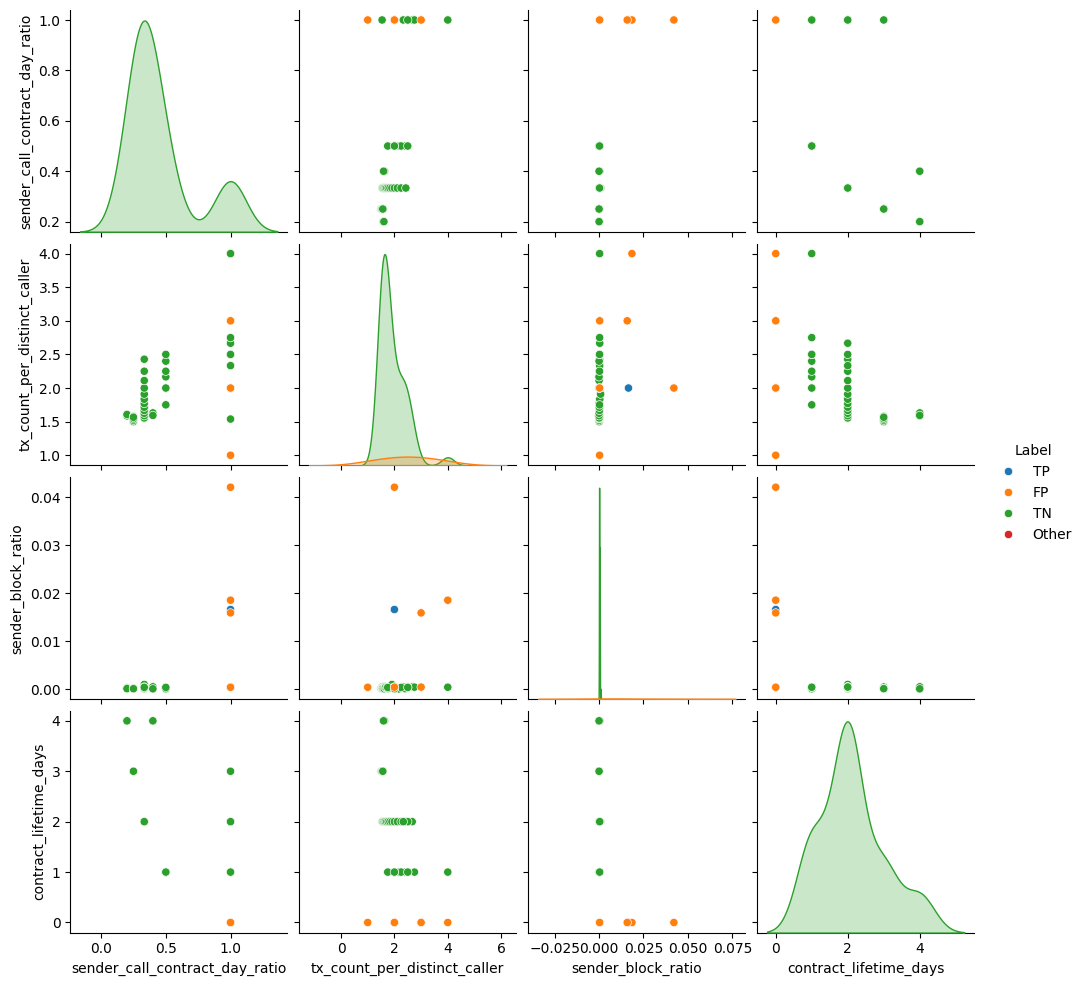

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV file into a DataFrame
df = pd.read_csv('./test_attack_result/Rugged.csv')

# Create a new column that labels the conditions
def label_conditions(row):
    if row['predicted'] == 1 and row['is_sus'] == 1:
        return 'TP'
    elif row['predicted'] == 1 and row['is_sus'] == 0:
        return 'FP'
    elif row['predicted'] == 0 and row['is_sus'] == 0:
        return 'TN'
    else:
        return 'Other'  # This handles any other cases, such as C=0 and D=1

df['Label'] = df.apply(label_conditions, axis=1)

col_filter = [
    'Label',
    'sender_call_contract_day_ratio','tx_count_per_distinct_caller','sender_block_ratio',
    'contract_lifetime_block','contract_block_involved',
    'contract_tx_count',
]
# Drop columns C and D for the pair plot
# df_filtered = df.drop(columns=['predicted', 'is_sus'])
df_filtered = df[col_filter]
# Create a pair plot with hue based on the label
sns.pairplot(df_filtered, hue='Label',hue_order=['TP','FP','TN','Other'])

# Show the plot
plt.show()
